In [ ]:
# prompt: import the dataset LifeExpectancyData.csv

import pandas as pd

# Replace 'path/to/your/LifeExpectancyData.csv' with the actual path to your file
df = pd.read_csv('/content/Life Expectancy Data.csv')
print(df.head())

       Country  Year      Status  Life expectancy   Adult Mortality  \
0  Afghanistan  2015  Developing              65.0            263.0   
1  Afghanistan  2014  Developing              59.9            271.0   
2  Afghanistan  2013  Developing              59.9            268.0   
3  Afghanistan  2012  Developing              59.5            272.0   
4  Afghanistan  2011  Developing              59.2            275.0   

   infant deaths  Alcohol  percentage expenditure  Hepatitis B  Measles   ...  \
0             62     0.01               71.279624         65.0      1154  ...   
1             64     0.01               73.523582         62.0       492  ...   
2             66     0.01               73.219243         64.0       430  ...   
3             69     0.01               78.184215         67.0      2787  ...   
4             71     0.01                7.097109         68.0      3013  ...   

   Polio  Total expenditure  Diphtheria    HIV/AIDS         GDP  Population  \
0    6.

In [ ]:
# See column names and data types
print(df.info())

# Get descriptive statistics
print(df.describe())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2938 entries, 0 to 2937
Data columns (total 22 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Country                          2938 non-null   object 
 1   Year                             2938 non-null   int64  
 2   Status                           2938 non-null   object 
 3   Life expectancy                  2928 non-null   float64
 4   Adult Mortality                  2928 non-null   float64
 5   infant deaths                    2938 non-null   int64  
 6   Alcohol                          2744 non-null   float64
 7   percentage expenditure           2938 non-null   float64
 8   Hepatitis B                      2385 non-null   float64
 9   Measles                          2938 non-null   int64  
 10   BMI                             2904 non-null   float64
 11  under-five deaths                2938 non-null   int64  
 12  Polio               

In [ ]:
# Check missing values
print(df.isnull().sum())

# Fill missing numeric columns with their mean
df.fillna(df.mean(numeric_only=True), inplace=True)


Country                              0
Year                                 0
Status                               0
Life expectancy                     10
Adult Mortality                     10
infant deaths                        0
Alcohol                            194
percentage expenditure               0
Hepatitis B                        553
Measles                              0
 BMI                                34
under-five deaths                    0
Polio                               19
Total expenditure                  226
Diphtheria                          19
 HIV/AIDS                            0
GDP                                448
Population                         652
 thinness  1-19 years               34
 thinness 5-9 years                 34
Income composition of resources    167
Schooling                          163
dtype: int64


In [ ]:
print(df.isnull().sum())

Country                            0
Year                               0
Status                             0
Life expectancy                    0
Adult Mortality                    0
infant deaths                      0
Alcohol                            0
percentage expenditure             0
Hepatitis B                        0
Measles                            0
 BMI                               0
under-five deaths                  0
Polio                              0
Total expenditure                  0
Diphtheria                         0
 HIV/AIDS                          0
GDP                                0
Population                         0
 thinness  1-19 years              0
 thinness 5-9 years                0
Income composition of resources    0
Schooling                          0
dtype: int64


In [ ]:
# Get correlation of all numeric features with 'Life expectancy '
correlations = df.corr(numeric_only=True)['Life expectancy '].sort_values(ascending=False)

# Display top & bottom correlations
print(correlations)


Life expectancy                    1.000000
Schooling                          0.715066
Income composition of resources    0.692483
 BMI                               0.559255
Diphtheria                         0.475418
Polio                              0.461574
GDP                                0.430493
Alcohol                            0.391598
percentage expenditure             0.381791
Total expenditure                  0.207981
Hepatitis B                        0.203771
Year                               0.169623
Population                        -0.019638
Measles                           -0.157574
infant deaths                     -0.196535
under-five deaths                 -0.222503
 thinness 5-9 years               -0.466629
 thinness  1-19 years             -0.472162
 HIV/AIDS                         -0.556457
Adult Mortality                   -0.696359
Name: Life expectancy , dtype: float64


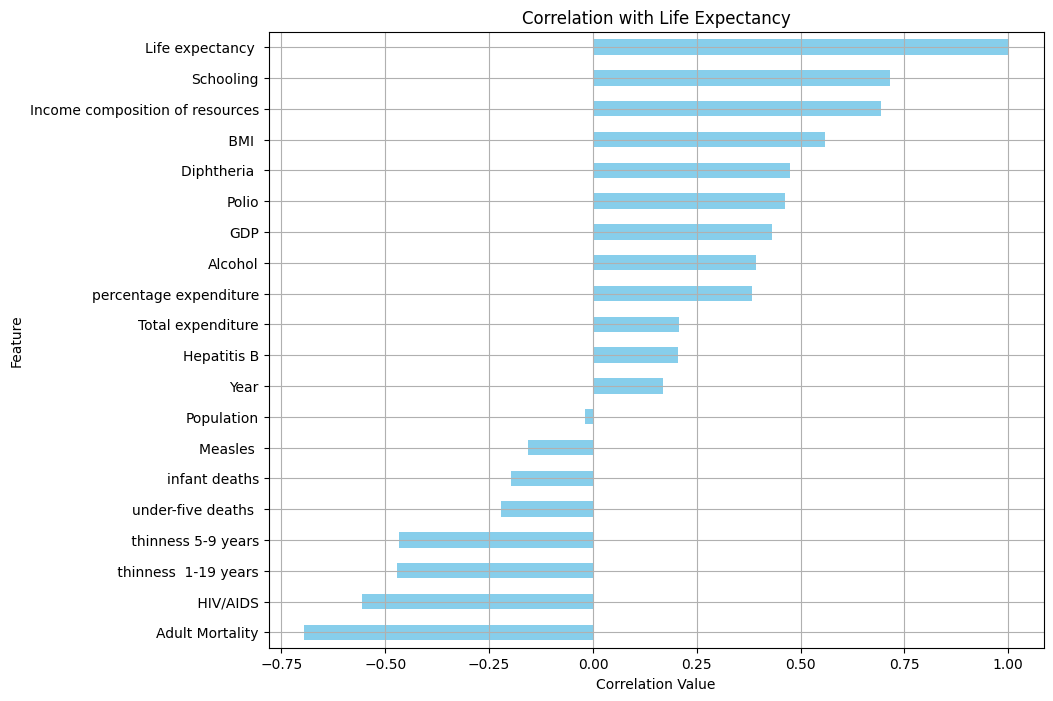

In [ ]:
import matplotlib.pyplot as plt

correlations = df.corr(numeric_only=True)['Life expectancy '].sort_values()
correlations.plot(kind='barh', figsize=(10, 8), color='skyblue')
plt.title('Correlation with Life Expectancy')
plt.xlabel('Correlation Value')
plt.ylabel('Feature')
plt.grid(True)
plt.show()


In [ ]:
# Step 1: Compute correlation of all numeric features with target
correlations = df.corr(numeric_only=True)['Life expectancy ']

# Step 2: Select features with |correlation| > 0.6 (strong correlation)
strong_features = correlations[(correlations > 0.7)|(correlations<-0.7)]

# Step 3: Drop the target column itself from the list
strong_features = strong_features.drop('Life expectancy ')

# Step 4: Display the selected feature names
selected_features = strong_features.index.tolist()
print("✅ Selected Features:", selected_features)
# Manually add important domain features
manual_features = ['Alcohol', 'infant deaths', 'GDP','BMI','HIV']

# Combine them safely (avoid duplicates)
final_features = list(set(selected_features + manual_features))
print("✅ Final Feature List:", final_features)

✅ Selected Features: ['Schooling']
✅ Final Feature List: ['BMI', 'Alcohol', 'infant deaths', 'GDP', 'Schooling', 'HIV']


In [ ]:
# Final selected features and target
features = [
    ' BMI ', 'Alcohol',

    'infant deaths', 'GDP', 'Schooling',
    ' HIV/AIDS'
]
target = 'Life expectancy '

# Define input (X) and output (y)
X = df[features]
y = df[target]

In [ ]:
print(X.head())
print(y.head())

    BMI   Alcohol  infant deaths         GDP  Schooling   HIV/AIDS
0   19.1     0.01             62  584.259210       10.1        0.1
1   18.6     0.01             64  612.696514       10.0        0.1
2   18.1     0.01             66  631.744976        9.9        0.1
3   17.6     0.01             69  669.959000        9.8        0.1
4   17.2     0.01             71   63.537231        9.5        0.1
0    65.0
1    59.9
2    59.9
3    59.5
4    59.2
Name: Life expectancy , dtype: float64


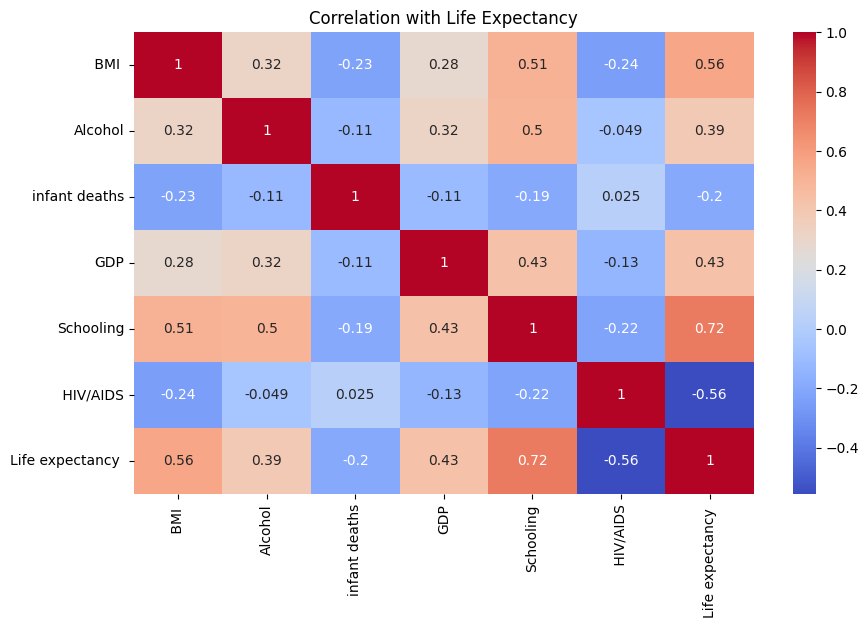

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Correlation heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(df[features + [target]].corr(), annot=True, cmap="coolwarm")
plt.title("Correlation with Life Expectancy")
plt.show()

In [ ]:
from sklearn.model_selection import train_test_split

# Split into training and testing sets (80% training, 20% testing)
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)


In [ ]:
from sklearn.linear_model import LinearRegression

# Step 1: Create a model object
model = LinearRegression()

# Step 2: Train the model using training data
model.fit(X_train, y_train)


LinearRegression()

In [ ]:
from sklearn.metrics import mean_squared_error, r2_score

# Step 1: Use the trained model to predict on test data
y_pred = model.predict(X_test)

# Step 2: Calculate error metrics
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

# Step 3: Print results
print("📊 Mean Squared Error (MSE):", mse)
print("✅ R² Score:", r2)


📊 Mean Squared Error (MSE): 22.400552678905893
✅ R² Score: 0.7414384361829258


/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128202 (\N{BAR CHART}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


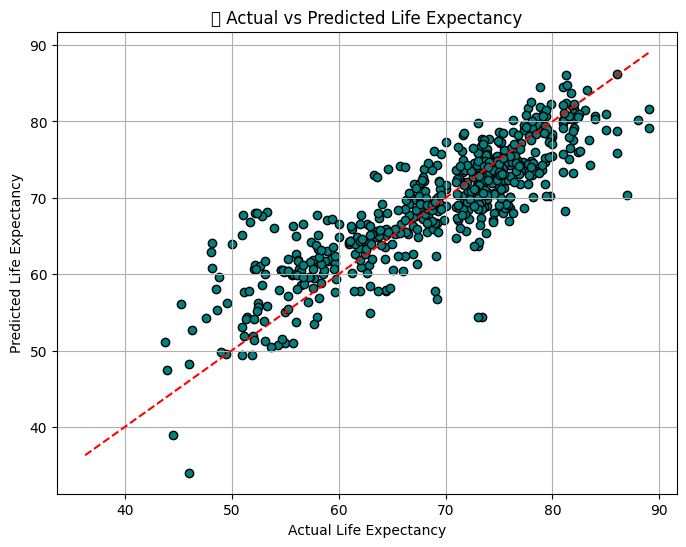

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred, color='teal', edgecolor='black')
plt.plot([y.min(), y.max()], [y.min(), y.max()], '--r')  # ideal prediction line
plt.xlabel("Actual Life Expectancy")
plt.ylabel("Predicted Life Expectancy")
plt.title("📊 Actual vs Predicted Life Expectancy")
plt.grid(True)
plt.show()


In [ ]:
import gradio as gr

# 🎯 Your feature order must match the training order
features = ['BMI', 'Alcohol',
            'infant deaths', 'GDP', 'Schooling', 'HIV/AIDS']

# 🧠 Predict function — this is what we are doing
def predict_life_expectancy(bmi, alcohol, infant, gdp, schooling, hiv):
    input_data = [[bmi, alcohol, infant, gdp, schooling, hiv,]]
    prediction = model.predict(input_data)[0]
    return round(prediction, 2)  # final life expectancy value

# 🖼️ Gradio UI
iface = gr.Interface(
    fn=predict_life_expectancy,
    inputs=[

        gr.Slider(10, 50, step=0.1, label="BMI"),
        gr.Slider(0, 15, step=0.1, label="Alcohol"),
        gr.Slider(0, 100, step=1, label="Infant Deaths"),
        gr.Slider(0, 100000, step=100, label="GDP"),
        gr.Slider(0, 20, step=0.1, label="Schooling"),
        gr.Slider(0, 30, step=0.1, label="HIV/AIDS"),

    ],
    outputs="number",
    title="🌍 Life Expectancy Predictor",
    description="🔎 Enter health and economic factors to predict average life expectancy."
)

# 🚀 Launch the app
iface.launch()


It looks like you are running Gradio on a hosted Jupyter notebook, which requires `share=True`. Automatically setting `share=True` (you can turn this off by setting `share=False` in `launch()` explicitly).

Colab notebook detected. To show errors in colab notebook, set debug=True in launch()
* Running on public URL: https://6a32776ef3a458fea5.gradio.live

This share link expires in 1 week. For free permanent hosting and GPU upgrades, run `gradio deploy` from the terminal in the working directory to deploy to Hugging Face Spaces (https://huggingface.co/spaces)
